In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
df = pd.read_csv("tagasiside_log.csv")
df.describe()

,Aeg,Kasutaja päring,Filtrid,Leitud ID-d,Leitud ained,LLM Vastus,Hinnang,Veatüüp
count,49,49,49,49,49,49,49,24
unique,49,49,1,49,1,49,2,3
top,2026-03-01 18:03:17,tahan filosoofilist ainet,"EAP:(0.0, 36.0), Sem:[], Hind:[], Linn:[], Ast...","['FLFI.01.105', 'FLFI.04.060', 'FLFI.02.189', ...",[],"\nSiin on mõned filosoofia kursused, mille koh...",👍 Hea,Otsing leidis valed ained (RAG viga)
freq,1,1,49,1,49,1,26,12


In [3]:
df['Veatüüp'].unique().tolist()

[nan,
 'LLM hallutsineeris/vastas valesti',
 'Otsing leidis valed ained (RAG viga)',
 'Filtrid olid liiga karmid/valed']

In [4]:
df['Hinnang'].describe()

count        49
unique        2
top       👍 Hea
freq         26
Name: Hinnang, dtype: object

In [5]:
df.groupby('Veatüüp').size()

Veatüüp
Filtrid olid liiga karmid/valed          1
LLM hallutsineeris/vastas valesti       11
Otsing leidis valed ained (RAG viga)    12
dtype: int64

<Axes: ylabel='count'>

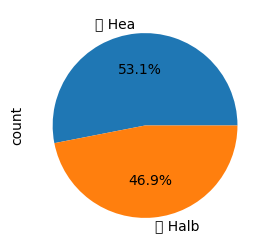

In [6]:
hinnangute_count = df['Hinnang'].value_counts()
warnings.filterwarnings("ignore", category=UserWarning)

hinnangute_count.plot(kind='pie', figsize=(3,3), autopct='%1.1f%%')

<Axes: xlabel='Veatüüp'>

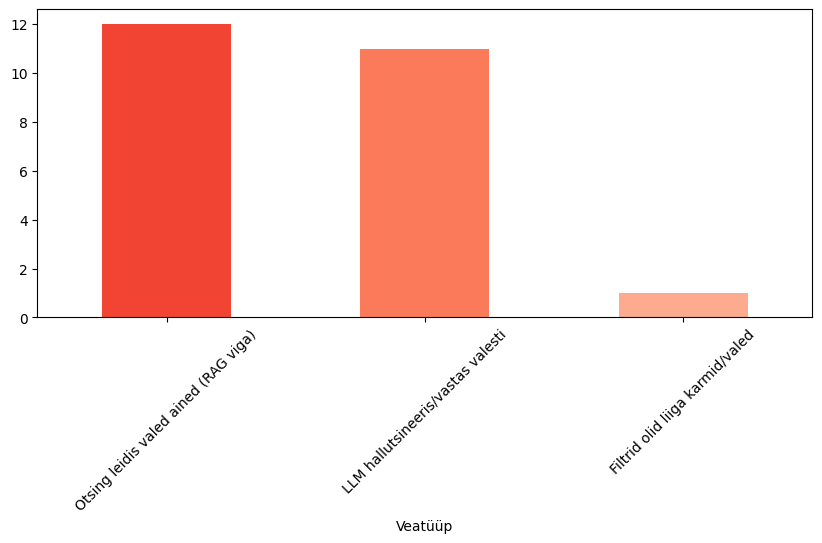

In [7]:
hinnangute_count = df['Veatüüp'].value_counts()
colors = plt.cm.Reds(np.linspace(0.6, 0.3, len(hinnangute_count)))

hinnangute_count.plot(kind='bar', figsize=(10, 4), rot=45,color=colors)


In [8]:
analuus = (df['Veatüüp'].dropna().value_counts().reset_index(name='Vigade arv'))

analuus['Protsent (%)'] = (
    analuus['Vigade arv'] /
    analuus['Vigade arv'].sum() * 100
).round(2)

analuus

,Veatüüp,Vigade arv,Protsent (%)
0,Otsing leidis valed ained (RAG viga),12,50.00
1,LLM hallutsineeris/vastas valesti,11,45.83
2,Filtrid olid liiga karmid/valed,1,4.17
